In [11]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

In [12]:
# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(42)

# Générer un jeu de données avec 200 échantillons, 2 variables explicatives, 2 classes séparées
X, y = make_classification(
  n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
  n_clusters_per_class=1, random_state=42
)

# Afficher les premières lignes pour vérification
print("Premiers échantillons de X:")
print(X[:5])
print("Premiers labels y:")
print(y[:5])


Premiers échantillons de X:
[[-0.87292898  0.013042  ]
 [ 1.31293463  2.77053357]
 [ 2.34042818  2.42099601]
 [ 2.29454774 -0.40438019]
 [ 0.94410516  0.4772409 ]]
Premiers labels y:
[1 1 1 1 1]


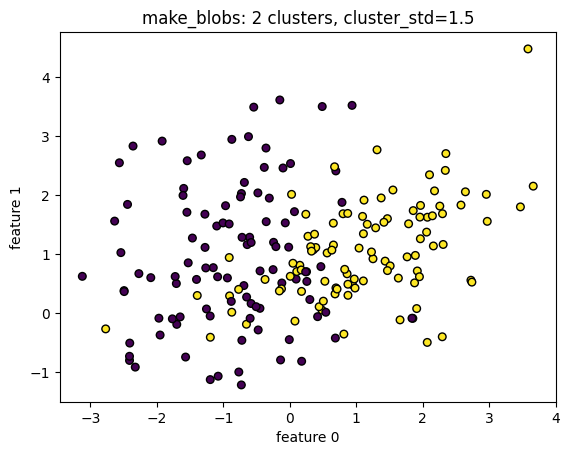

In [13]:
# simple scatter plot of the blobs

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=30, edgecolor='k')
plt.title('make_blobs: 2 clusters, cluster_std=1.5')
plt.xlabel('feature 0'); plt.ylabel('feature 1')
plt.show()

In [ ]:
# Stratify is used to maintain class proportions in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tailles: X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")

Tailles: X_train=(140, 2), X_test=(60, 2), y_train=(140,), y_test=(60,)


In [15]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [16]:

train_acc = gnb_model.score(X_train, y_train)
test_acc = gnb_model.score(X_test, y_test)
y_pred = gnb_model.predict(X_test)

print(f"Accuracy entraînement: {train_acc:.3f}")
print(f"Accuracy test: {test_acc:.3f}")
print("Rapport de classification (test):")
print(classification_report(y_test, y_pred))

Accuracy entraînement: 0.857
Accuracy test: 0.867
Rapport de classification (test):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



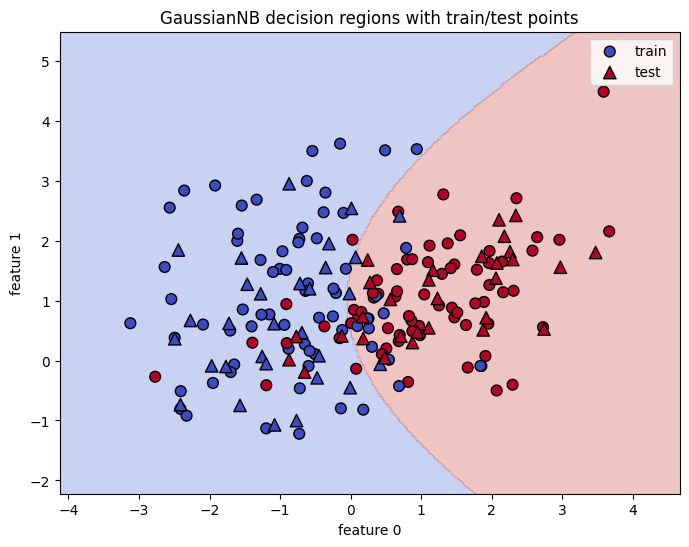

In [17]:
# create a grid covering all data with some padding
padding = 1.0
x_min, x_max = X[:,0].min() - padding, X[:,0].max() + padding
y_min, y_max = X[:,1].min() - padding, X[:,1].max() + padding
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# predict class for each grid point
Z = gnb_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# plot decision regions
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# plot training points
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm',
            edgecolor='k', s=60, label='train')

# plot test points (highlighted with larger black edge)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm',
            edgecolor='black', s=80, marker='^', label='test')

plt.title('GaussianNB decision regions with train/test points')
plt.xlabel('feature 0'); plt.ylabel('feature 1')
plt.legend()
plt.show()